<a href="https://colab.research.google.com/github/Ana-PPS/data-and-analytcs/blob/MVP_III/MVP_Sprint_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo


### Análise Mercado de Compra e Venda de Energia Elétrica

Empresa do setor de energia, com baixa penetração no ambiente de comercialização, busca entender onde está inserida e assim estudar potencialidades para ampliar o seu mercado.

Para tanto, utilizando dados disponibilizados pela CCEE (Câmara de Comercialização de Energia Elétrica), relacionados aos contratos de compra e venda de energia, busca-se responder as seguintes perguntas:

1. Quem são os maiores agentes e qual a fatia de mercado que absorvem?
2. Qual o montante médio comercializado por ano?
3. Como tem variado o índice de participação de mercado dos top10 agentes ao longo dos últimos 4 anos?



# Detalhamento

## Busca pelos dados

Os datasets foram construídos a partir de planilhas eletrônicas obtidas no site da CCEE, disponibilizadas no endereço https://www.ccee.org.br/web/guest/dados-e-analises/dados-mercado-mensal, especificamente no bloco de informação de Dados Individuais (exemplo do último dado disponível https://www.ccee.org.br/documents/80415/25552621/InfoMercado_Dados_Individuais-jul2023.xlsx/5cc2ba8f-a612-0bcf-eaea-3fe82335fa98, consulta feita em 12/09/2023)


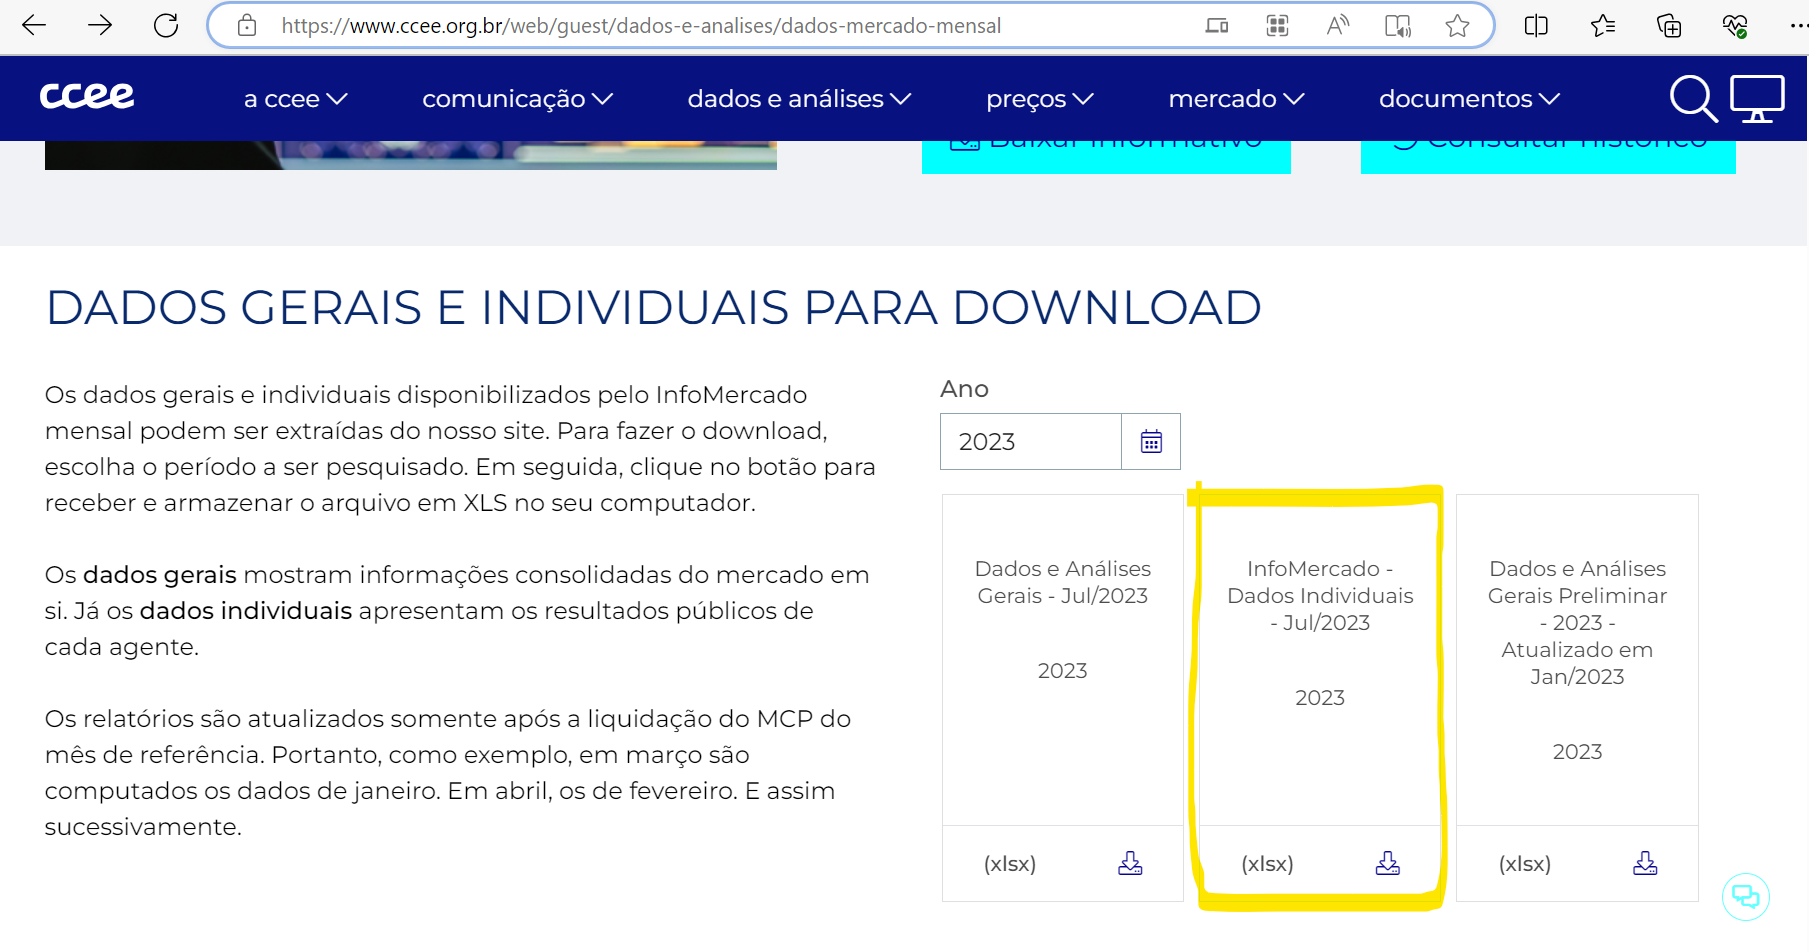![image.png]()



As planilhas, em formato excel, foram originalmente baixadas para uma pasta de armazenamento local. Dela foram extraídas as tabelas correspondentes ao Volume de Contratação Mensal de Vendas (Tabela 001) e Compras (Tabela 002), da aba 001 Contratos.

Adicionalmente, também foram coletados os dados dos Perfis dos Agentes (Tabela 001), da aba 007 Lista de Perfis, para poder fazer o cruzamento entre as tabelas e possibilitar a execução das análises que irão fornecer as respostas construídas no tópico Objetivo deste MVP.

Os relatórios do InformercadoCCEE são atualizados somente após a liquidação do MCP (Mercado de Curto Prazo) do mês de referência. Portanto, como exemplo, em setembro são computados os dados de julho.

A CCEE iniciou em 2023 a migração dos dados para um Portal de Dados Abertos, no entanto, até o momento não estão disponíveis as informações individualizadas por agente, e tampouco por períodos anteriores a Maio/2023, que é o escopo abarcado por este MVP.

## Coleta / Extração

Os dados, de origem de pasta local, foram inseridos manualmente no Armazenamento de Blob do Azure, em pasta nomeada como _mvpdadosccee_, no subdiretório _raw_ e subdiretórios correspondentes.

As imagens a seguir resumem a sequência dos armazenamentos de origem:


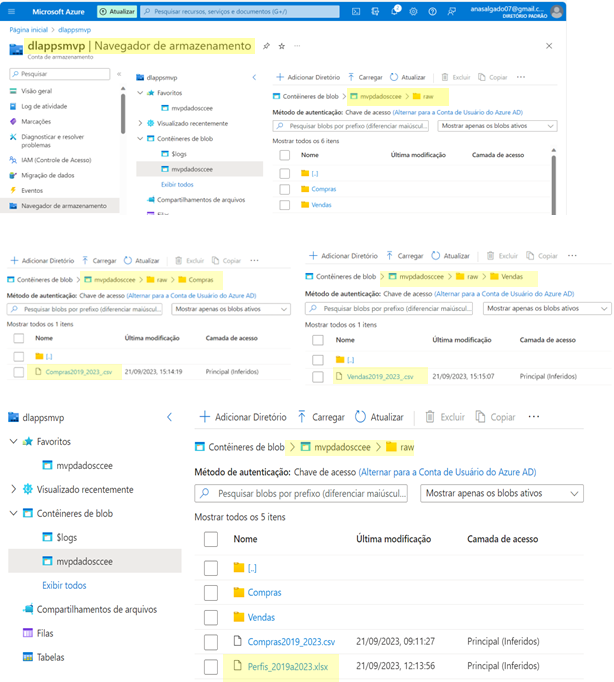





*   O arquivo Compras2019_2023.csv, com dados dos contratos de compra de energia elétrica, contabilizados de Janeiro/2019 a Julho/2023
*   O arquivo Vendas2019_2023.csv, com dados dos contratos de venda de energia elétrica, contabilizados de Janeiro/2019 a Julho/2023
* O arquivo Perfis_2019a2023.csv, que reúne os dados dos agentes cadastrados na CCEE, com contabilizações registradas no período.





Posteriormente, por meio de um serviço vinculado, no caso deste MVP, nomeado como _AzureBlobStorage1_, foram criados Conjunto de Dados, com os arquivos armazenados no contêiner de blob descrito acima, para uso posterior nos fluxos de dados da etapa de Modelagem e Carga.


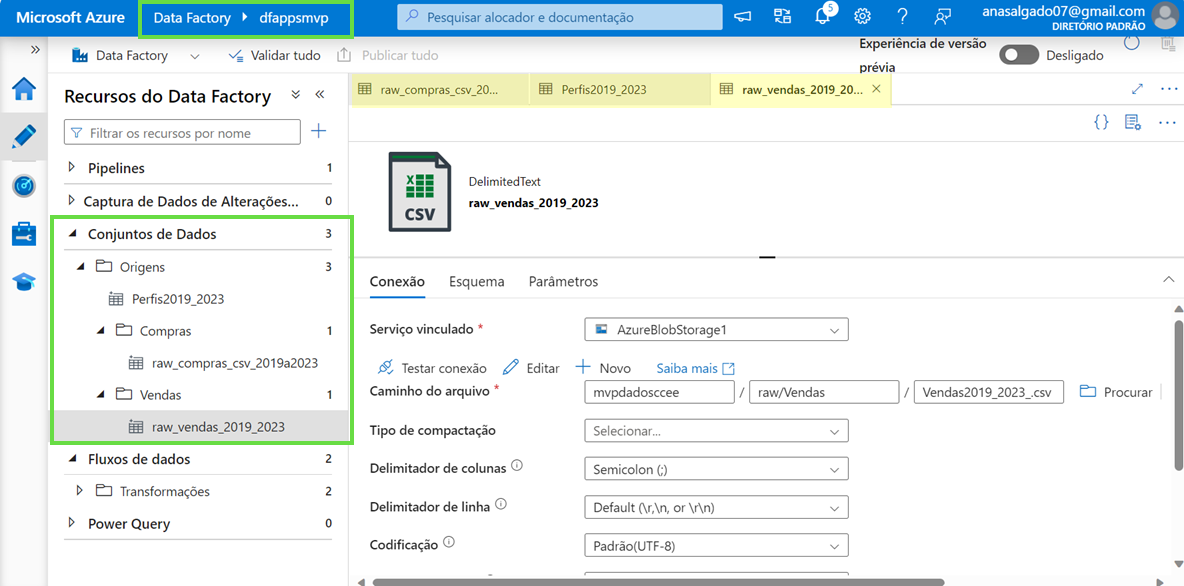

## Modelagem / Transformação

Essa etapa inicia-se com a criação de 02 (dois) fluxos de dados para executar algumas transformação nas tabelas de origem.

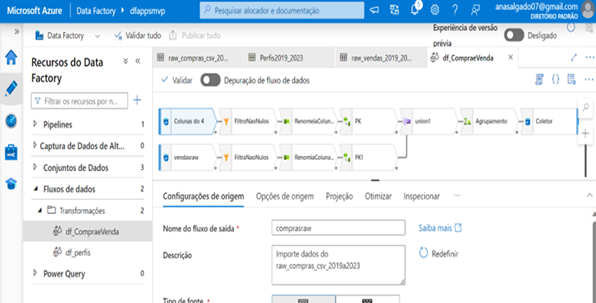



*   df_CompraeVenda

Esse fluxo tem início conectando-se, separadamente, aos conjunto de dados nomeados _raw_compras_csv_2019a2023 e _raw_vendas_2019_2023_.

Obs.: As etapas de 1 a 4 são iguais para ambas as origens, portanto as imagens disponibilizadas exemplificam apenas um dos conjuntos de dados.

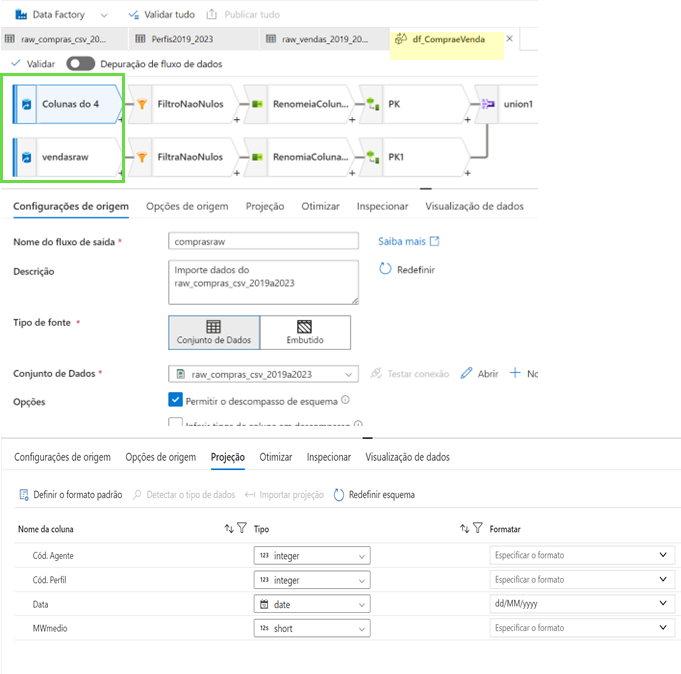



Na sequência é adicionada uma etapa de filtro nas colunas de valores de _MWmedio_ para manter apenas as linhas com valores Não Nulos.

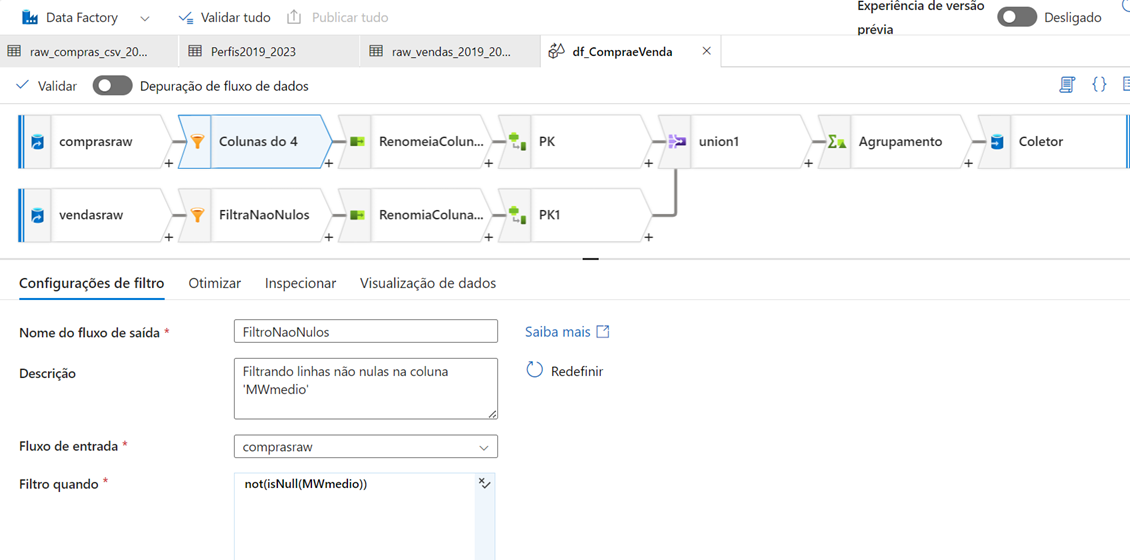

A etapa seguinte renomeia a coluna de MWmedio, para Compras MWmedio e Vendas MWmedio, respectivamente, para fins de adequada identificação após a junção dos conjunto de dados.

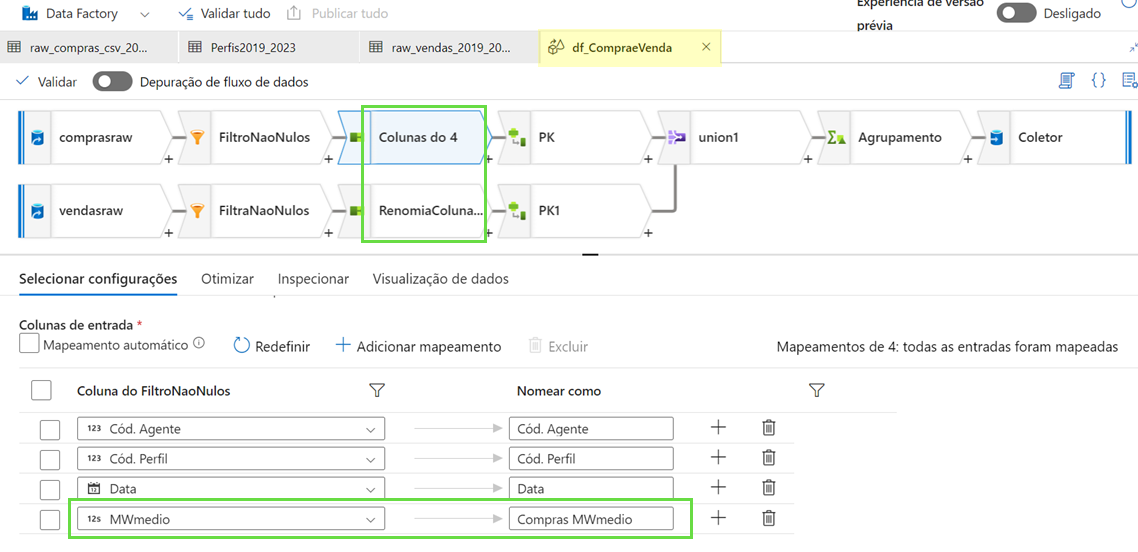


Na sequência foi inserida uma etapa de "ColunaDerivada", com o objetivo de criar uma chave primária para cada um dos conjuntos de dados, unindo as colunas _Cód.Agente_ e _Cód. Perfil_.

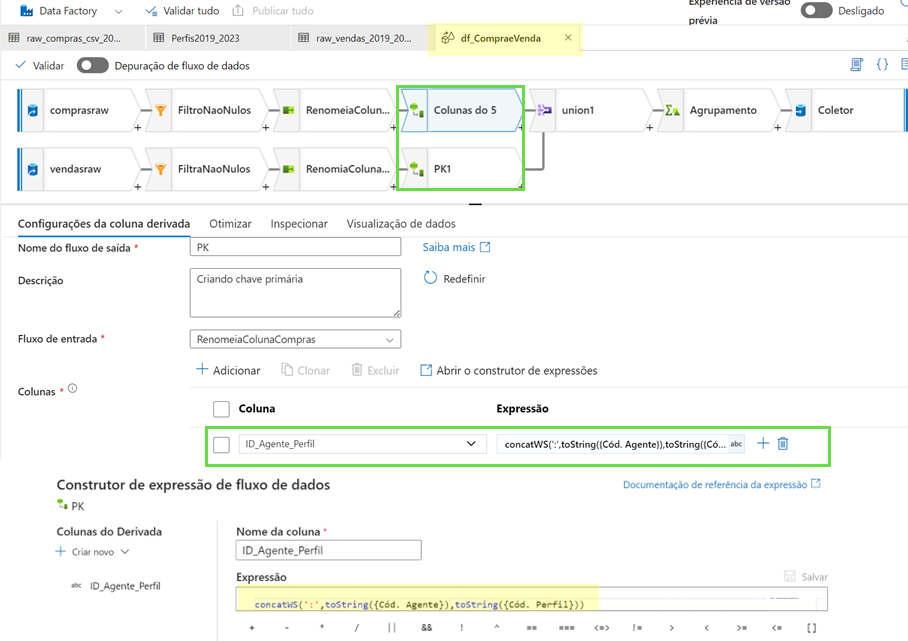

### Metadados




## Carga

# Análise

### Qualidade dos Dados

# Conclusão